In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/colab/CORE_Proyecto_i/retail_sales_dataset_clean.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age segment,Sales Level
0,0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Middle Adult,Baja
1,1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Young Adult,Media
2,2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mature Adult,Baja
3,3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Middle Adult,Baja
4,4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Young Adult,Baja


In [7]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1000 non-null   int64         
 1   Transaction ID    1000 non-null   int64         
 2   Date              1000 non-null   datetime64[ns]
 3   Customer ID       1000 non-null   object        
 4   Gender            1000 non-null   object        
 5   Age               1000 non-null   int64         
 6   Product Category  1000 non-null   object        
 7   Quantity          1000 non-null   int64         
 8   Price per Unit    1000 non-null   int64         
 9   Total Amount      1000 non-null   int64         
 10  Age segment       1000 non-null   object        
 11  Sales Level       1000 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 93.9+ KB


#Exploración de Datos Avanzada

Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.



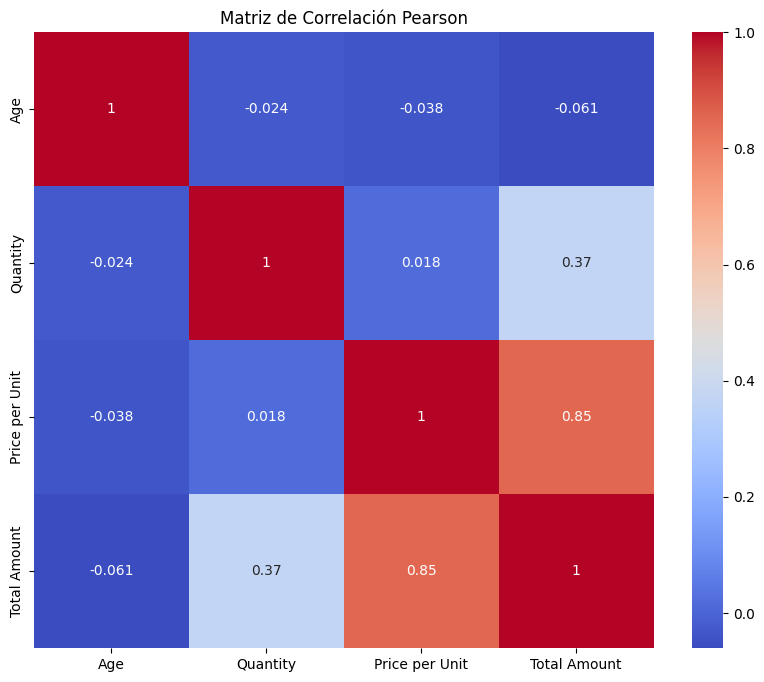

In [16]:
# Creamos la matriz de correlación de las variables mas relevantes

data = {
    'Age' : df['Age'],
    'Quantity' : df['Quantity'],
    'Price per Unit' : df['Price per Unit'],
    'Total Amount' : df['Total Amount']
}

# Metodo Pearson
df_data = pd.DataFrame(data)
df_corr = df_data.corr(method='pearson')
df_corr

# Mapa de calor Pearson

plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación Pearson')
plt.show()

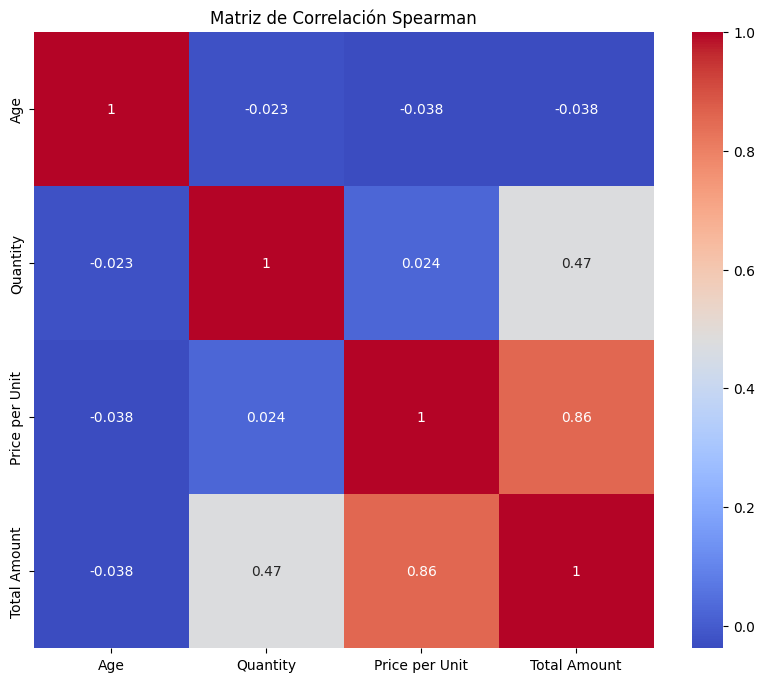

In [12]:
# Metodo Pearson
df_data = pd.DataFrame(data)
df_corr = df_data.corr(method='spearman')
df_corr

# Mapa de calor Spearman

plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación Spearman')
plt.show()

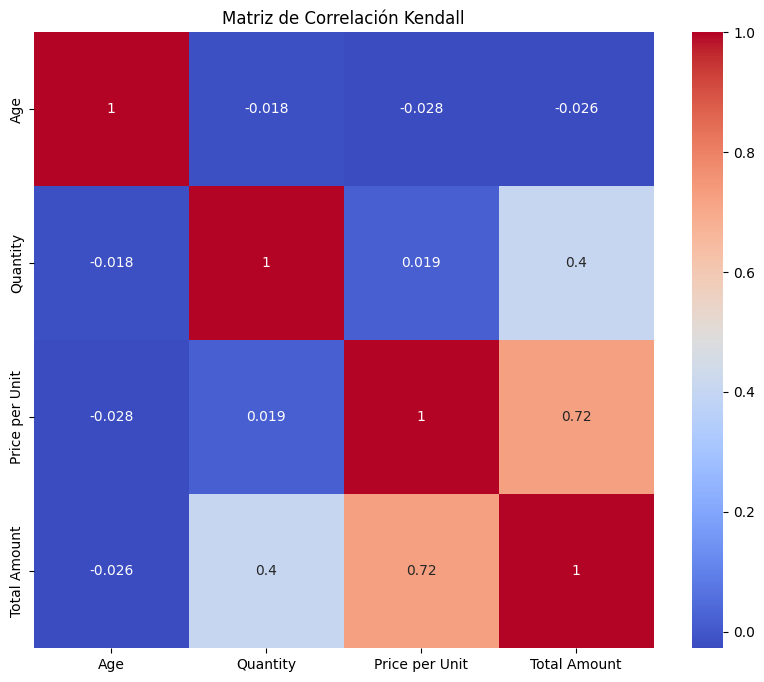

In [13]:
# Metodo Kendall
df_data = pd.DataFrame(data)
df_corr = df_data.corr(method='kendall')
df_corr

# Mapa de calor Kendall

plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación Kendall')
plt.show()

Crea subplots para comparar diferentes variables clave.

Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

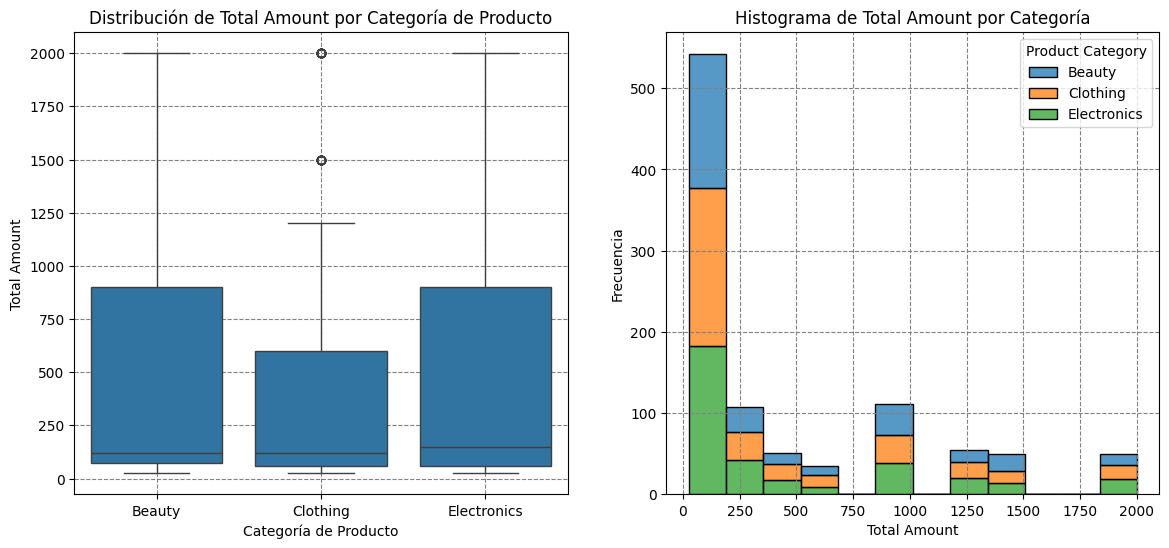

In [27]:
# Histograma y diagrama de caja de total amount por categoria de producto

fil_df = df[df['Product Category'].isin(['Beauty', 'Clothing', 'Electronics'])]

# Crear subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot
sns.boxplot(data=fil_df, x='Product Category', y='Total Amount', ax=ax1)
ax1.set_title('Distribución de Total Amount por Categoría de Producto')
ax1.set_ylabel('Total Amount')
ax1.set_xlabel('Categoría de Producto')
ax1.grid(True, which='both', axis='both', color='gray', linestyle='--')

# Histograma con 'hue' para diferenciar por categoría
sns.histplot(data=fil_df, x='Total Amount', hue='Product Category', multiple='stack', kde=False, ax=ax2)
ax2.set_title('Histograma de Total Amount por Categoría')
ax2.set_xlabel('Total Amount')
ax2.set_ylabel('Frecuencia')
ax2.grid(True, which='both', axis='both', color='gray', linestyle='--')